## Stock Prices

In [1]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import numpy as np
import matplotlib.pyplot as plt
import os

data = np.loadtxt(fname = 'data.txt', delimiter = ',')
X, y = data[:,:5], data[:,5]

print("Features sample: {}".format(X[1]))
print("Result: {}".format(y[1]))

Features sample: [  2.13038000e+03   2.14508000e+03   2.12698000e+03   6.55267000e+03
   6.95752900e+06]
Result: 2144.11


In [2]:
m = X.shape[0] #number of samples

#training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train shape: {}".format(X_train.shape))
print("Test shape: {}".format(X_test.shape))

Train shape: (159, 5)
Test shape: (40, 5)


### Ridge as Linear Regressor

In [3]:
clf = RidgeCV(alphas = [0.1, 1.0, 10.0], normalize=True)
clf.fit(X_train, y_train)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=True, scoring=None, store_cv_values=False)

In [4]:
#predict
prediction = clf.predict(X_test);
print("Expected is: {}".format(y_test[0]))
print("Prediction is: {}".format(prediction[0]))
print("Score: {}".format(clf.score(X_test, y_test)))
print("Alpha: {}".format(clf.alpha_))

Expected is: 2594.9
Prediction is: 2601.844222368334
Score: 0.9936744857065992
Alpha: 0.1


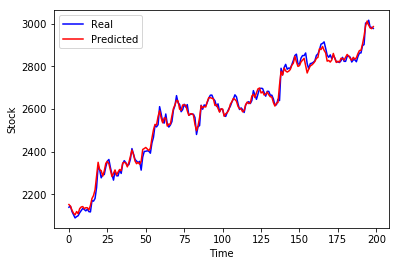

In [5]:
#plotting all data
plt.figure(1)
real, = plt.plot(np.arange(m), y, 'b-', label='real')
predicted, = plt.plot(np.arange(m), clf.predict(X), 'r-', label='predicted')
plt.ylabel('Stock')
plt.xlabel('Time')
plt.legend([real, predicted], ['Real', 'Predicted'])
plt.show()

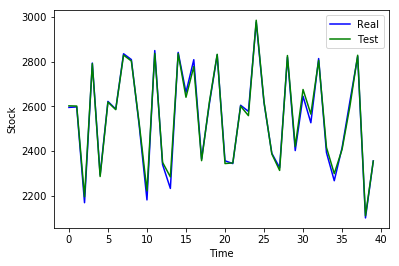

In [6]:
#plotting only test
mtest = X_test.shape[0]
real, = plt.plot(np.arange(mtest), y_test, 'b-', label='real')
test, = plt.plot(np.arange(mtest), clf.predict(X_test), 'g-', label='test')
plt.ylabel('Stock')
plt.xlabel('Time')
plt.legend([real, test], ['Real', 'Test'])
plt.show()